<a href="https://colab.research.google.com/github/FranciscoTeon/Video-game-ratings-best-to-worst-Data-Analysis/blob/main/Popular_videogames_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

In [2]:
games_df = pd.read_csv('games_df.csv')
games_df.head()

,Title,Release_Date,Team,Rating,Num_of_Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Day,Month,Year
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4.6K,4.8K,25,2,2022
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6.3K,3.6K,10,12,2019
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5K,2.6K,3,3,2017
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4.9K,1.8K,15,9,2015
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8.3K,2.3K,24,2,2017


In [4]:
class CustomKMeans:
    def __init__(self, k):
        self.k = k
        self.kmeans = KMeans(n_clusters=self.k)

    def fit(self, data):
        #Fits the KMeans model to the data
        self.kmeans.fit(data)

    def predict(self, data):
        #Predicts the cluster for each sample in the data
        return self.kmeans.predict(data)

    def get_labels(self):
        #Returns the cluster labels
        return self.kmeans.labels_

        #sse method
    def get_cluster_centers(self):
        #Returns the cluster center
        return self.kmeans.cluster_centers_

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
games_df['genre_encoded'] = label_encoder.fit_transform(games_df['Genres'])

games_df['genre_encoded'] = games_df['genre_encoded'].astype(float)

predict:  [0 2 0 ... 0 0 0]
labels [0 2 0 ... 0 0 0]
Cluster centers:  [[  3.77948052 116.45064935]
 [  3.59002494 221.13466334]
 [  3.73446154  48.22769231]]


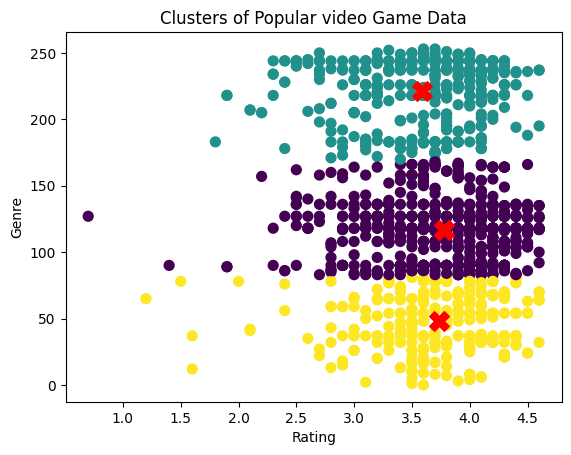

In [5]:
# Implement the k-means algorithm on your dataset
custom_kmeans = CustomKMeans(k=3)
custom_kmeans.fit(games_df[['Rating', 'genre_encoded']])
predict = custom_kmeans.predict(games_df[['Rating', 'genre_encoded']])
labels = custom_kmeans.get_labels()
get_cluster = custom_kmeans.get_cluster_centers()

print('predict: ', predict)
print('labels', labels)
print('Cluster centers: ', get_cluster)

plt.scatter(games_df['Rating'], games_df['genre_encoded'], c=predict, s=50, cmap='viridis')
plt.scatter(get_cluster[:, 0], get_cluster[:, 1], s=200, c='red', marker='X')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.title('Clusters of Popular video Game Data')
plt.show()

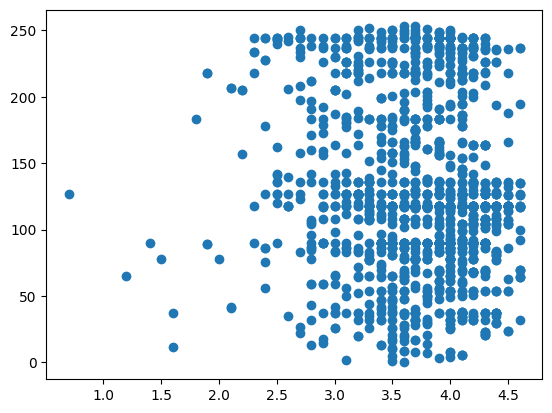

In [6]:
#Select a set of columns to cluster over
plt.scatter(games_df["Rating"], games_df["genre_encoded"])
plt.show()

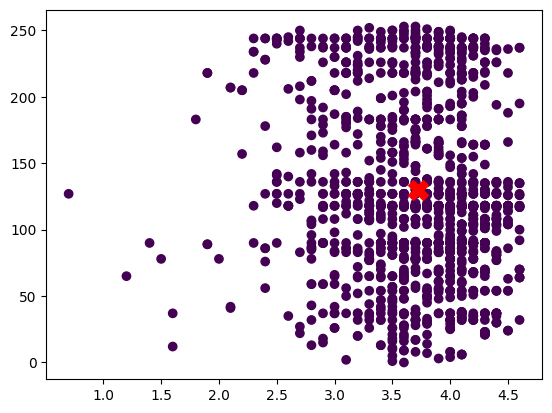

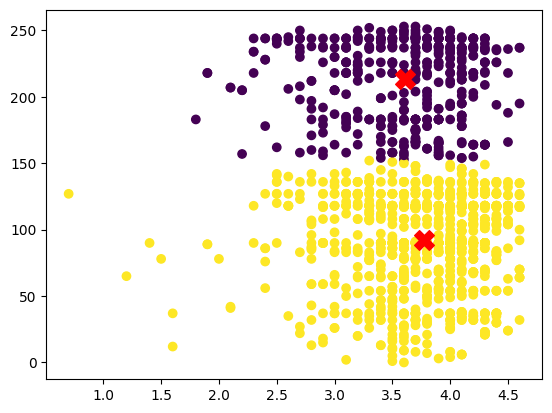

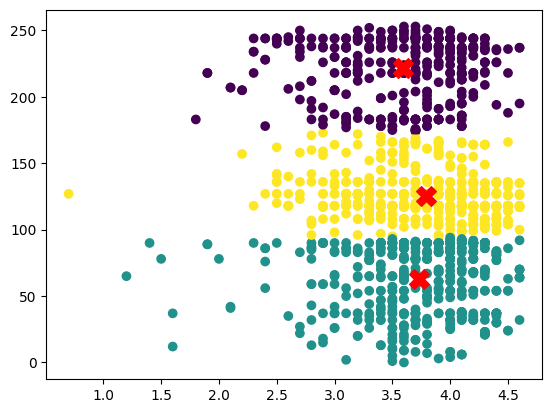

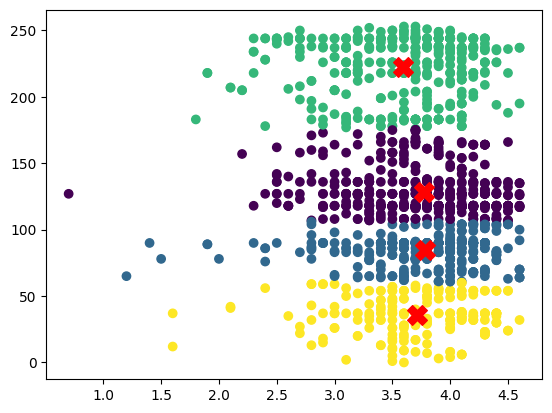

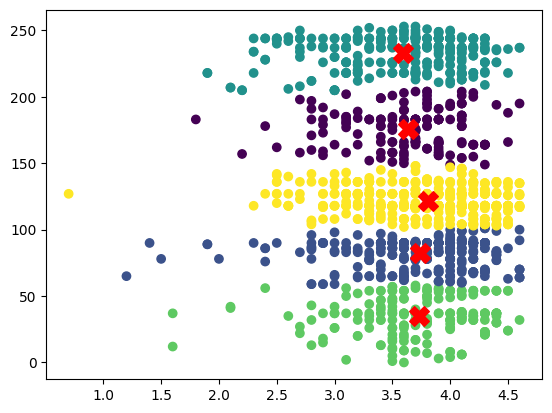

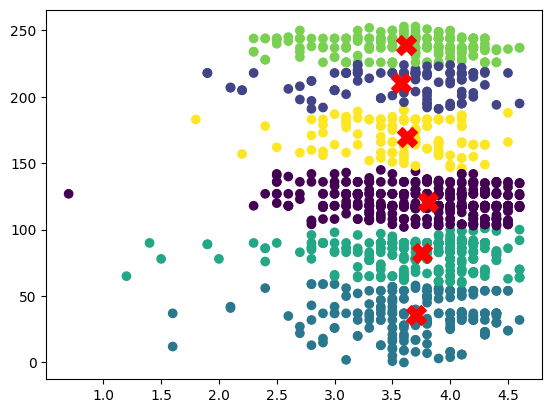

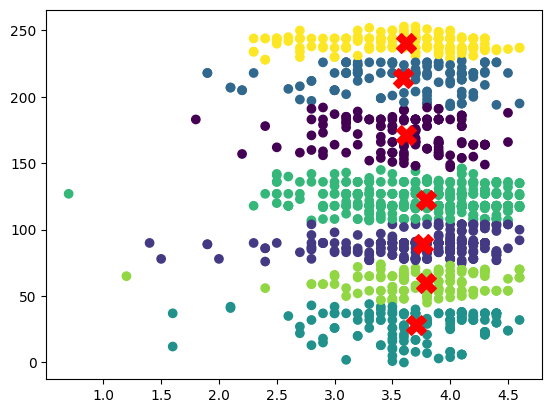

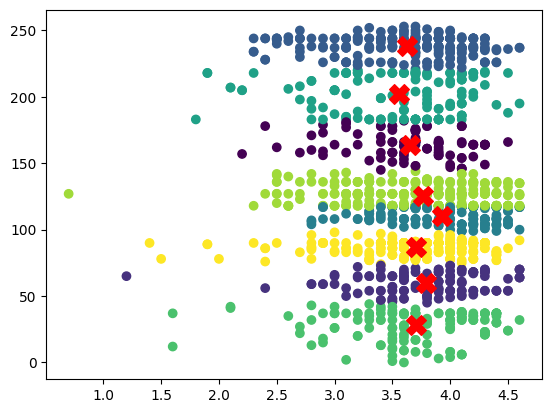

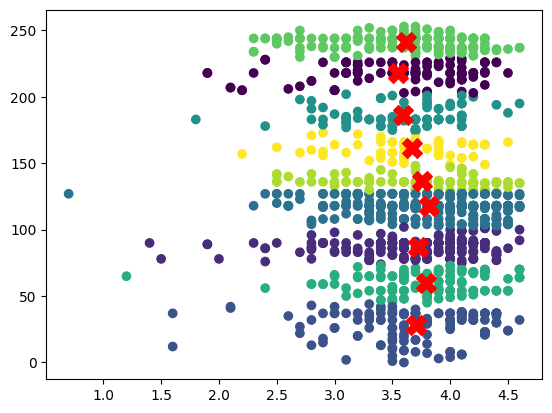

In [7]:
# Run your clustering algorithm and try several k values
def plot_clusters(imdb_df, custom_kmeans):
    plt.scatter(games_df["Rating"], games_df["genre_encoded"], c=custom_kmeans.get_labels(), cmap='viridis')
    plt.scatter(custom_kmeans.get_cluster_centers()[:, 0], custom_kmeans.get_cluster_centers()[:, 1], s=200, c='red', marker='X')

for i in range(1,10):
    custom_kmeans = CustomKMeans(i)
    custom_kmeans.fit(games_df[['Rating', 'genre_encoded']])
    custom_kmeans.predict(games_df[['Rating', 'genre_encoded']])
    plot_clusters(games_df, custom_kmeans)
    plt.show()

Cluster centers:  [[  3.77948052 116.45064935]
 [  3.59002494 221.13466334]
 [  3.73446154  48.22769231]]
Inertia:  705787.3335468346


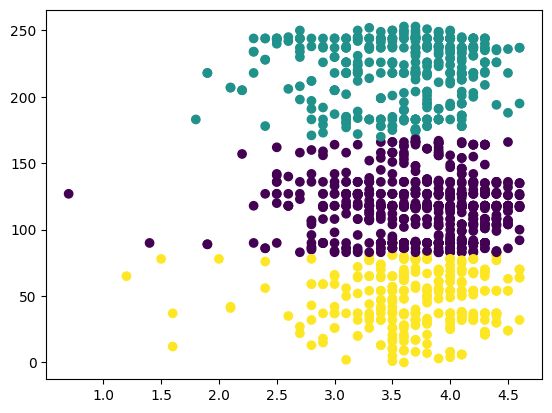

In [8]:
# Run the sklearn KMeans algorithm and see if you get same or similar results
km = KMeans(n_clusters=3)
km = km.fit(games_df[['Rating', 'genre_encoded']])
km.predict(games_df[['Rating', 'genre_encoded']])
print('Cluster centers: ', km.cluster_centers_)
print('Inertia: ', km.inertia_)

plt.scatter(games_df["Rating"], games_df["genre_encoded"], c=km.labels_)
plt.show()

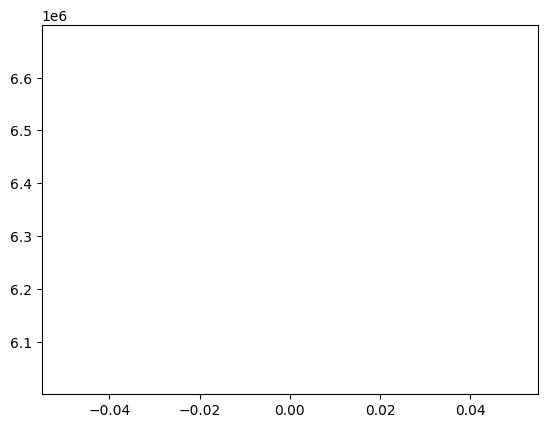

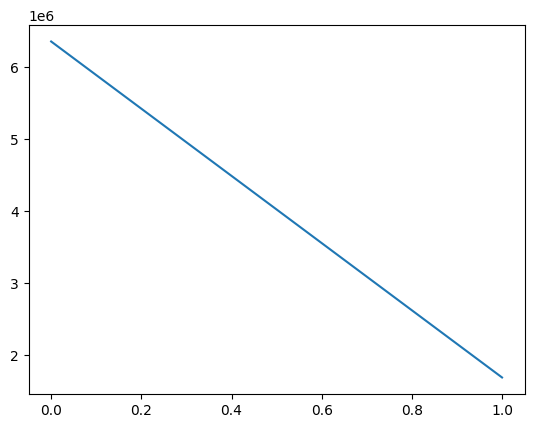

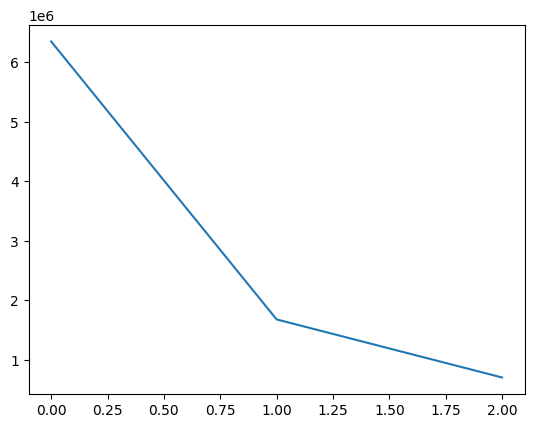

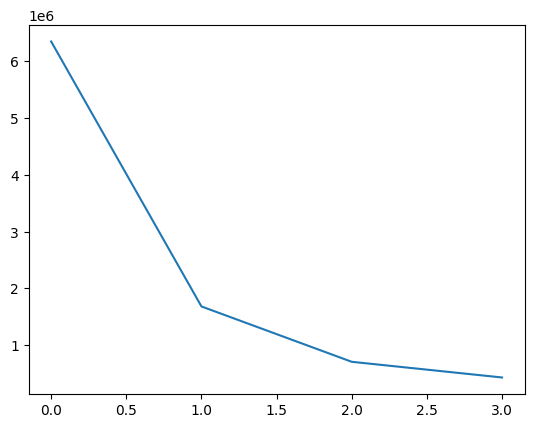

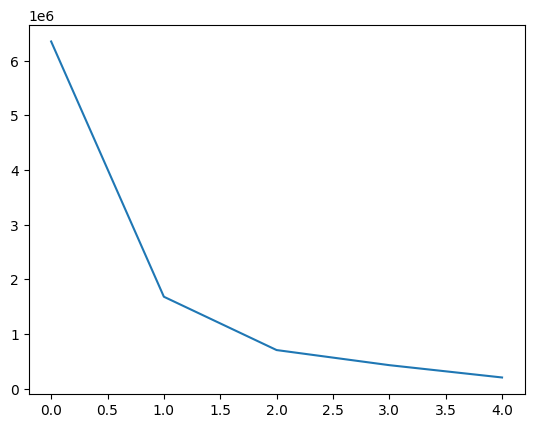

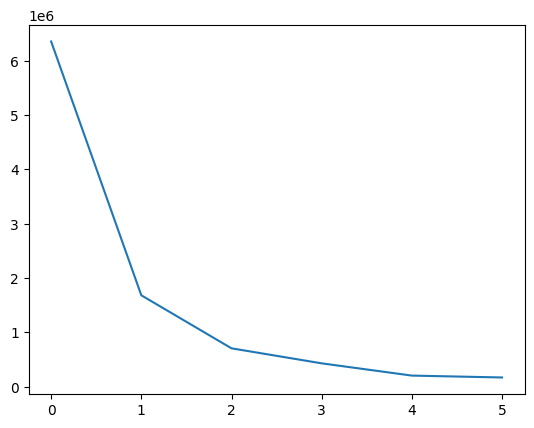

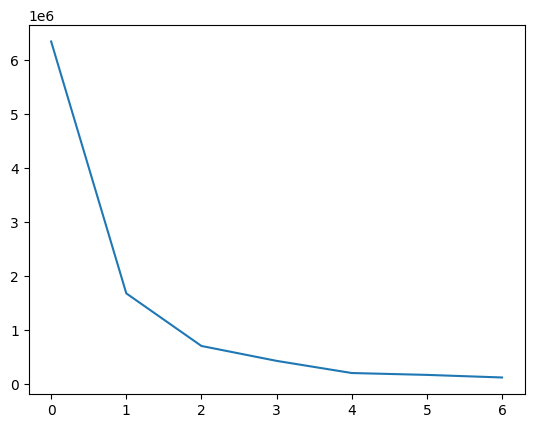

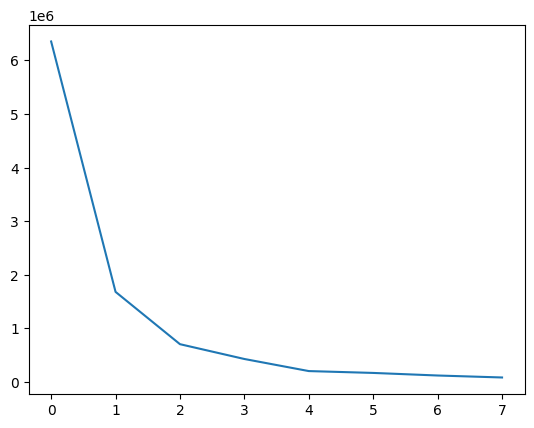

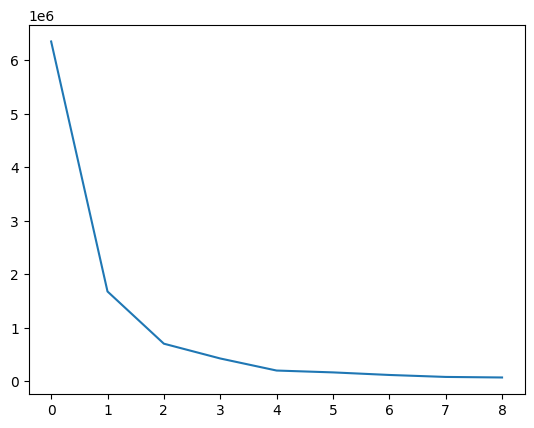

In [10]:
# What k value is works best?

inertia = []
for i in range(1,10):
  km = KMeans(n_clusters=i)
  km = km.fit(games_df[['Rating', 'genre_encoded']])
  km.predict(games_df[['Rating', 'genre_encoded']])
  inertia.append(km.inertia_)

  plt.plot(inertia)
  plt.show()